<a href="https://colab.research.google.com/github/BernasconiLorenzo06/geopandas_nuovo/blob/main/GEOPANDAS_Es_VERIFICA_SOMMATIVA%2C_ondina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [ ]:

!pip install contextily
import contextily

In [11]:
stazioni_bici = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Bernasconi Lorenzo - bike_areesosta.zip")
stazioni_bici3857 = stazioni_bici.to_crs(epsg=3857)
stazioni_bici3857.head()

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.

ERROR:fiona._env:Pointer 'hGeom' is NULL in 'OGR_G_GetGeometryType'.



,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry
0,2,5339,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (1021713.272 5689457.937)
1,4,1545,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (1020609.678 5703278.104)
2,8,6330,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (1011315.437 5696816.682)
3,9,7165,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (1019322.014 5697768.905)
4,10,6660,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (1015293.689 5693448.080)


In [ ]:

quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")
quartieri3857 = quartieri.to_crs(epsg=3857)
quartieri3857.head()

2

In [ ]:
ax = stazioni_bici3857.plot(figsize=(12,6),markersize = 1,column = "stalli_tot",cmap = "Reds")
contextily.add_basemap(ax)


visualizzare il numero di aree di sosta presenti in un quartiere inserito dall'utente. Controllare che il quartiere sia effettivamente presente.

In [ ]:
quartiereInput = input("quartiere: ")
quartiereselezionato = quartieri3857[quartieri3857["NIL"] == quartiereInput]
aree_sosta_inquartieri = stazioni_bici3857[stazioni_bici3857.intersects(quartiereselezionato.unary_union)]
n_aree = len(aree_sosta_inquartieri)
print("nel quartiere : "+quartiereInput+"ci sono "+str(n_aree) + "aree di sosta")

aggiungere al geodataframe delle aree di sosta anche le informazioni del quartiere in cui si trovano

In [34]:
joined = geopandas.sjoin(stazioni_bici3857,quartieri3857,predicate = "intersects",how = "left")

visualizzare il numero di aree di sosta per ogni quartiere. Ordinare in ordine decrescente sul numero di aree di sosta

In [ ]:

stazioniInQuartieri = joined.groupby("NIL")[["id_amat"]].count().sort_values(by= "id_amat",ascending  = False).reset_index()
stazioniInQuartieri
     

In [66]:
finale = quartieri_aree.merge(stazioniInQuartieri, on = "NIL")
finale

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry,id_amat
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((1019043.223 5690701.816, 1019040.205...",6
1,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((1019281.533 5698653.937, 1019379.177...",18
2,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((1020580.947 5704131.420, 1020451.234...",5
3,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((1024184.198 5705106.594, 1024200.172...",3
4,20,LORETO - CASORETTO - NOLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5631.442413,1.747499e+06,95,"POLYGON ((1027528.368 5699391.604, 1027579.085...",36
...,...,...,...,...,...,...,...,...,...,...
71,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((1020993.250 5696802.574, 1020966.948...",36
72,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((1023209.291 5695669.544, 1023143.444...",70
73,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((1028641.594 5691736.463, 1028685.812...",3
74,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((1031630.537 5702542.500, 1031599.390...",5


visualizzare i quartieri in cui non ci sono aree di sosta;

In [ ]:
quartieri_no_aree= quartieri3857[~quartieri3857.intersects(stazioni_bici3857.unary_union)]#ondina è la negazione
quartieri_no_aree

visualizzare una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta

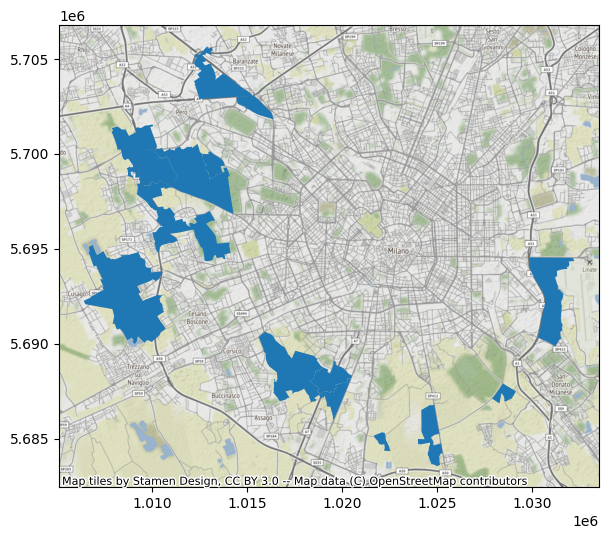

In [41]:
ax = quartieri_no_aree.plot(figsize=(12,6))
contextily.add_basemap(ax)

visualizzare il/i quartiere/i con più aree di sosta

In [ ]:
piustazioni = finale[finale["id_amat"] == finale["id_amat"].max()]
piustazioni

visualizzare una mappa del quartiere con più aree di sosta con anche le aree di sosta di quel quartiere

In [ ]:
quartieri_aree= quartieri3857[quartieri3857.intersects(stazioni_bici3857.unary_union)]#ondina è la negazione
quartieri_aree

In [ ]:
duomo_aree = stazioni_bici3857[stazioni_bici3857.intersects(piustazioni.unary_union)]
duomo_aree

In [ ]:
ax = piustazioni.plot(figsize=(12,12),color = "yellow",edgecolor = "k",alpha = 0.5)
duomo_aree.plot(ax=ax,color = "red")
contextily.add_basemap(ax)

visualizzare i quartieri che hanno un numero di aree di sosta minori della media;

In [ ]:
mediaareesosta = finale["id_amat"].mean()
mediaareesosta

In [71]:
mioriDellaMedia = finale[finale["id_amat"] < mediaareesosta]

visualizzare una mappa di Milano con l'indicazione delle aree di sosta presenti nei quartieri trovati nell'esercizio precedente

In [ ]:
aree_in_minori = stazioni_bici3857[stazioni_bici3857.intersects(mioriDellaMedia.unary_union)]
aree_in_minori

In [ ]:
ax = mioriDellaMedia.plot(figsize=(12,12),edgecolor = "blue")
aree_in_minori.plot(ax=ax,figsize=(12,12),color = "red")
contextily.add_basemap(ax)

visualizzare una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;

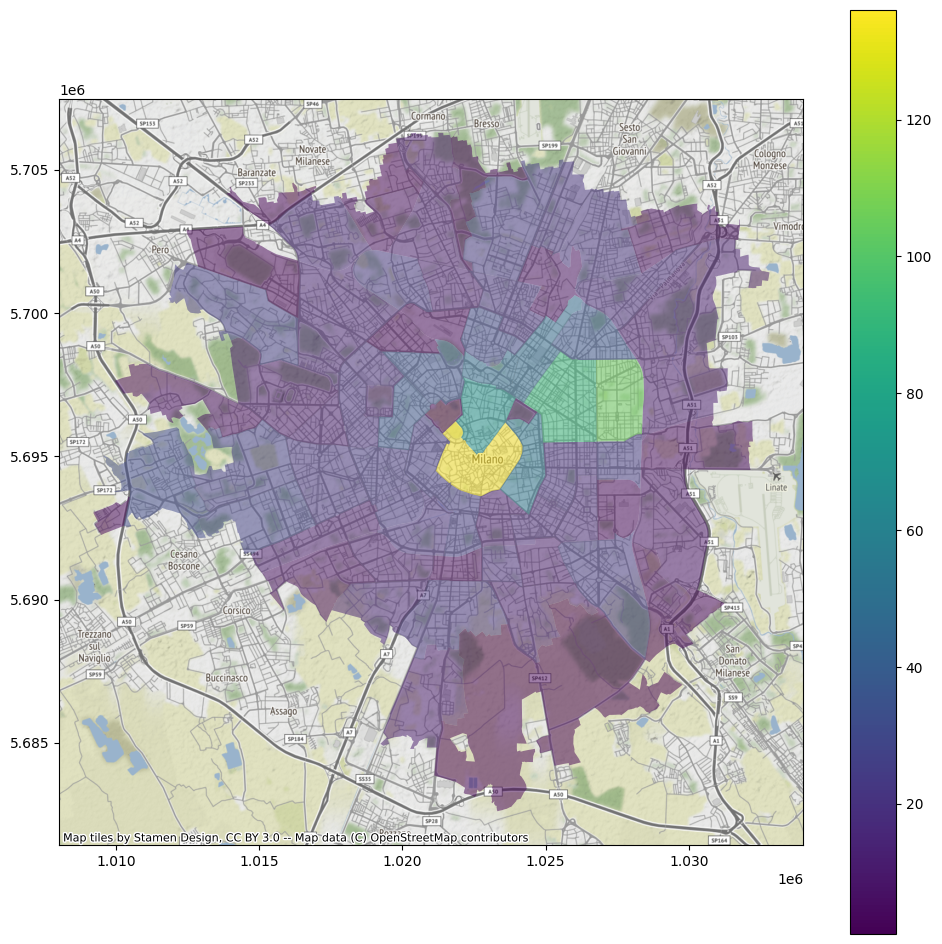

In [78]:
ax = finale.plot(figsize=(12,12),column = "id_amat",legend = True,alpha = 0.5)
contextily.add_basemap(ax)

dato un punto della città (inserito sottoforma di coordinate geografiche dall'utente), visualizzare l'elenco di tutte le aree di sosta a meno di 500 m da quel punto.

In [79]:
from shapely.geometry import Point

In [83]:
latitudine = float(input())
longitudine = float(input())
punto= geopandas.GeoSeries([Point(longitudine,latitudine)], crs = 4326)
punto3857 = punto.to_crs(3857)
stazioni_bici3857[stazioni_bici3857.distance(punto3857.unary_union)<500]

45.42
9.17


45.42
9.17


/usr/local/lib/python3.10/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


HTTPError: ignored

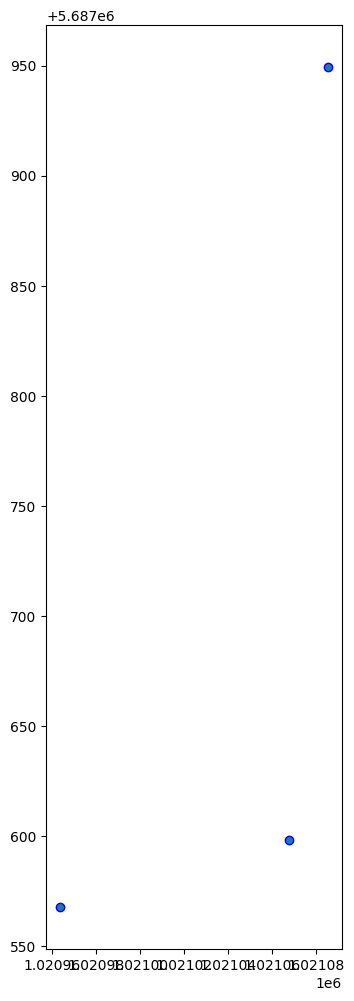

In [85]:
latitudine = float(input())
longitudine = float(input())
punto= geopandas.GeoSeries([Point(longitudine,latitudine)], crs = 4326)
punto3857 = punto.to_crs(3857)
ax = stazioni_bici3857[stazioni_bici3857.distance(punto3857.unary_union)<500].plot(figsize=(12,12),edgecolor = "blue")
contextily.add_basemap(ax)